# TP03 : Régression logistique

## Régression linéaire polynomiale 
Dans cette partie, comme expliqué en cours nous voyons un exemple simple d'un modèle linéaire sous forme d'un polynome multiple. 



In [1]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np
import random

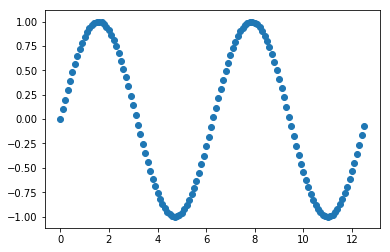

In [17]:
X = np.arange(0,4*np.pi,0.1)
Y = np.sin(X)

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

In [26]:
degree = 8 #degrès du polynome résultant. 

polynomial_features = PolynomialFeatures(degree = degree)
X_TRANSF = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_TRANSF, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.03868245819856334
R2:  0.9969993318360635


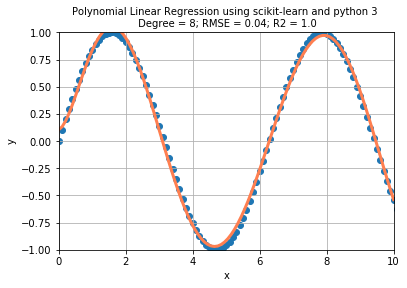

In [29]:
x_new_min = 0.0
x_new_max = 10.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(-1,1)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y)
plt.show()

## Régression logistique 

La régression logistique est généralement utilisée à des fins de classification. Contrairement à la régression linéaire, la variable à prédire ne peut prendre qu'un nombre limité de valeurs (valeurs discrètes). 

Lorsque le nombre de résultats possibles est seulement deux, on parle de régression logistique binaire.

![](img/logistic.JPG) 

Dans la figure ci-dessus on comprend que la régression logistique est composée d'une régression linéaire suivie de l'application d'une certaine fonction. Cette fonction est la fonction sigmoid dont voici le graphe : 

![](img/sigmoid.JPG) 


## 1 - Préparation des données : 
Les données consistent en un ensemble de notes des etudiants et la valeur à prédire est si l'etudiant est admis(1) ou pas(0) 

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [290]:
header = ["Note1", "Note2", "Admis"]
notes = pd.read_csv('datasets/marks.txt', names=header)

In [291]:
X = notes.iloc[:, :-1].values
y = notes.iloc[:, -1].values


X.shape

(100, 2)

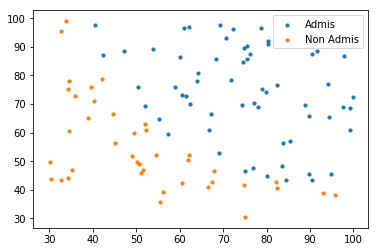

In [292]:
admis = notes.loc[y == 1]
admis = admis.drop("Admis", axis=1)
non_admis = notes.loc[y == 0]
non_admis = non_admis.drop("Admis", axis=1)

plt.scatter(admis.iloc[:, 0], admis.iloc[:, 1], s=10, label='Admis')
plt.scatter(non_admis.iloc[:, 0], non_admis.iloc[:, 1], s=10, label='Non Admis')
plt.legend()
plt.show()

## 2- Régression logistique 

**Mathematical expression of the algorithm**:
![](img/Math.PNG)


$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

In [293]:
# TODO : Calculer le sigmoid de la valeur x 
def sigmoid(x):
    # Fonction d'activation utilisée pour rendre les valeurs réelles entre 0 et 1 
    return  1 / (1 + np.exp(-x))

#Test : 
sigmoid(0)

0.5

In [294]:
# TODO : La fonction de cout utilisée dans la régression logistique 
def J(x,y,theta): 
    m = x.shape[0]
    h = sigmoid(np.dot(x, theta))
     
    total_cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    grad = (1 / m) * np.dot(x.T, h - y)
    
    return total_cost, grad 

In [295]:
# TODO : Programmer la fonction d'entrainement du modèle 
def train(x,y, theta, num_iters=400, alpha=1): 
    couts =[]
    
    for i in range(num_iters):
        cout, grad = J(x,y, theta)
        theta = theta - (alpha * grad)
        couts.append(cout)
    
    return theta , couts

In [296]:
# TODO : fonction de normalisation des données X 
def normalisation(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm = (X - mean)/std
    return X_norm

# TODO : Entrainer le modèle en choisissant les bons hyperparamètres.
X  = normalisation(X)
X = np.append(np.ones((X.shape[0],1)),X,axis=1)
y=y.reshape(X.shape[0],1)
theta = np.zeros((X.shape[1],1))
print(theta.shape)
theta, couts = train(X,y, theta)
print(theta.shape)

(3, 1)
(3, 1)


In [297]:
print("Theta optimisés :",theta)
print("Le coût du modèle avec les dérnières valeurs de theta :",J_history[-1])

Theta optimisés : [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
Le coût du modèle avec les dérnières valeurs de theta : 0.20360044248226664


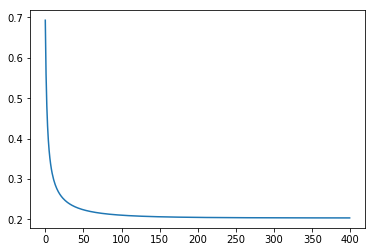

In [298]:
plt.plot(couts)

#### Dessiner la ligne de décision : 
La ligne de décision est : $\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ 


(1,)


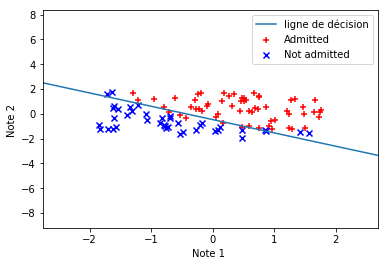

In [305]:
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
print(theta[1].shape)
y_values = (- (theta[0] + np.dot(theta[1], x_values[0])) / theta[2],  - (theta[0] + np.dot(theta[1], x_values[1])) / theta[2])

pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

plt.plot(x_values, y_values, label='ligne de décision')
plt.xlabel('Note 1 ')
plt.ylabel('Note 2 ')
plt.margins(-0.3, 0.1)
plt.legend()
plt.show()

In [300]:
# TODO : donner la fonction de prédiction qui retourne la probabilité que X est dans chaque classe 
def predict(x):
    
    return proba 
    

## 3- Implementation sous sklearn : 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# TODO : Diviser les données en données d'entrainement et données de tests (Fait dans le TP02 )
## Décider de la taille des données pour chaque set
X_train, X_test, y_train, y_test = 

# Créer le modèle 
model = LogisticRegression()

# Entraîner le modèle 
model.fit(X, y)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y.flatten(),predicted_classes)
